# CREDIT CARD FRAUD DETECTION



# Data Cleaning and Preprocessing


In [ ]:
import pandas as pd

ccf_df = pd.read_csv("/content/creditcard.csv")
print(ccf_df.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [ ]:
missing_values = ccf_df.isnull().sum()
print(missing_values)

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
# duplicate rows
duplicate_rows = ccf_df[ccf_df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])
ccf_df = ccf_df.drop_duplicates()

Number of duplicate rows: 0


In [ ]:
# Check data types
data_types = ccf_df.dtypes
print(data_types)

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object


In [ ]:
#stats
stats = ccf_df.describe()
print(stats)

                 id            V1            V2            V3            V4  \
count  11046.000000  11046.000000  11046.000000  11046.000000  11046.000000   
mean    5522.500000      0.289275     -0.379306      1.160554     -0.599833   
std     3188.849871      0.603648      0.510983      0.718361      0.677674   
min        0.000000     -2.513872    -20.936274     -1.887163     -3.996094   
25%     2761.250000     -0.164938     -0.520236      0.696355     -0.937550   
50%     5522.500000      0.046835     -0.348873      1.052061     -0.515545   
75%     8283.750000      0.949536     -0.157170      1.588649     -0.156584   
max    11045.000000      1.695400      1.828794      4.440555      2.240182   

                 V5            V6            V7            V8            V9  \
count  11046.000000  11046.000000  11046.000000  11046.000000  11046.000000   
mean       0.296414      0.520460      0.445591     -0.156259      1.183819   
std        0.648659      0.715619      0.500479    

Using Z-score to detect outliers

In [ ]:
import numpy as np

# defining z score
def detect_outliers_z_score(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

numerical_columns =  ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
outliers = ccf_df[numerical_columns].apply(detect_outliers_z_score)

print(outliers.sum())


V1         10
V2        126
V3        106
V4        120
V5         87
V6        105
V7         81
V8        160
V9        127
V10       164
V11       113
V12        90
V13        15
V14        93
V15        23
V16        80
V17       173
V18       181
V19        98
V20       205
V21       162
V22        75
V23       144
V24         7
V25       134
V26        10
V27       178
V28       180
Amount      0
dtype: int64


Scaling difference

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                     'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                     'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
                      'Amount']

df_scaled = ccf_df.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

print(df_scaled.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0  0.535300  0.899036  0.692735  0.627357  0.096600  0.693513  0.086856   
1   1  0.831253  0.904027  0.386430  0.571886  0.099817  0.682621  0.084108   
2   2  0.535390  0.877963  0.571407  0.567343  0.095386  0.718088  0.092337   
3   3  0.561076  0.897310  0.574299  0.465970  0.099213  0.708203  0.086838   
4   4  0.548088  0.912406  0.539565  0.568897  0.096086  0.686270  0.090270   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.731826  0.202061  ...  0.449394  0.578088  0.435569  0.318162  0.402477   
1  0.731249  0.175587  ...  0.442700  0.504364  0.442087  0.256576  0.406180   
2  0.738214  0.133143  ...  0.457766  0.621542  0.468421  0.208750  0.360013   
3  0.743863  0.137020  ...  0.446509  0.555182  0.433158  0.147569  0.453404   
4  0.716491  0.224564  ...  0.449677  0.623943  0.434751  0.330308  0.371122   

        V26       V27       V28    Amount  C

Standarization of data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                     'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                     'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
                      'Amount']

df_standardized = ccf_df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df_standardized[numerical_columns])

print(df_standardized.head())


   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.911041 -0.176810  1.859473  0.761623 -0.257054  0.296873  0.146712   
1   1  1.152751  0.045523 -0.838750  0.251133 -0.029715 -0.128364 -0.078178   
2   2 -0.910417 -1.115702  0.790702  0.209323 -0.342803  1.256341  0.595297   
3   3 -0.731299 -0.253744  0.816181 -0.723603 -0.072350  0.870408  0.145223   
4   4 -0.821865  0.418869  0.510210  0.223628 -0.293371  0.014099  0.426128   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.110074 -0.497091  ...  0.070768  0.677439 -0.171900  0.002686  0.063115   
1  0.097025 -0.910416  ... -0.180352 -0.782399  0.249203 -0.671200  0.154413   
2  0.254430 -1.573061  ...  0.384820  1.537881  1.950366 -1.194524 -0.984001   
3  0.382082 -1.512539  ... -0.037482  0.223870 -0.327662 -1.863978  1.318896   
4 -0.236473 -0.145753  ...  0.081385  1.585435 -0.224712  0.135587 -0.710079   

        V26       V27       V28    Amount  C

Data Formatting

In [ ]:
# Drop rows with NaN values in the target variable
df_cleaned = df_standardized.dropna(subset=['Class'])

# Separate features (X) and target variable (y)
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


#class imbalance

# oversampling
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_over, y_over = oversampler.fit_resample(X_train, y_train)

# undersampling
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

# class weights
class_labels = np.unique(y_train)
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=class_labels, y=y_train)

class_weights_dict = dict(zip(class_labels, class_weights))
print("Class Weights:")
print(class_weights_dict)


Class Weights:
{0.0: 0.5022086527218397, 1.0: 113.69117647058823}


 Feature Selection using Random Forest Feature

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
feature_importances = rf_classifier.feature_importances_

indices = np.argsort(feature_importances)[::-1]
print("Feature Importances:")
for i, idx in enumerate(indices):
    print(f"{i+1}. Feature: {X.columns[idx]}, Importance: {feature_importances[idx]}")


Feature Importances:
1. Feature: V12, Importance: 0.1966965542971858
2. Feature: V14, Importance: 0.1546628571357131
3. Feature: V17, Importance: 0.10033882137974279
4. Feature: V11, Importance: 0.08082671678673485
5. Feature: V10, Importance: 0.07027076643657848
6. Feature: V4, Importance: 0.06333823941600747
7. Feature: V3, Importance: 0.05681131316356935
8. Feature: V16, Importance: 0.0436771078075616
9. Feature: V9, Importance: 0.03344362571562186
10. Feature: id, Importance: 0.021886573143252926
11. Feature: V20, Importance: 0.014370852483915992
12. Feature: V26, Importance: 0.013063940891760838
13. Feature: V27, Importance: 0.012867091665465165
14. Feature: V18, Importance: 0.012195713946536449
15. Feature: V25, Importance: 0.01201360321519041
16. Feature: V8, Importance: 0.00966587111109913
17. Feature: V5, Importance: 0.009574448780880006
18. Feature: V6, Importance: 0.009481777619120583
19. Feature: V2, Importance: 0.00894411564543296
20. Feature: V23, Importance: 0.0086108826

Train-Test-Split

In [ ]:
print("Number of NaN values in y:", y.isnull().sum())

Number of NaN values in y: 0


In [ ]:
df_cleaned = ccf_df.dropna(subset=['Class'])

X = df_cleaned.drop(columns=['Class'])  # Features
y = df_cleaned['Class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (8836, 30) (8836,)
Testing set shape: (2209, 30) (2209,)


# Understanding and Visualizing the dataset using EDA

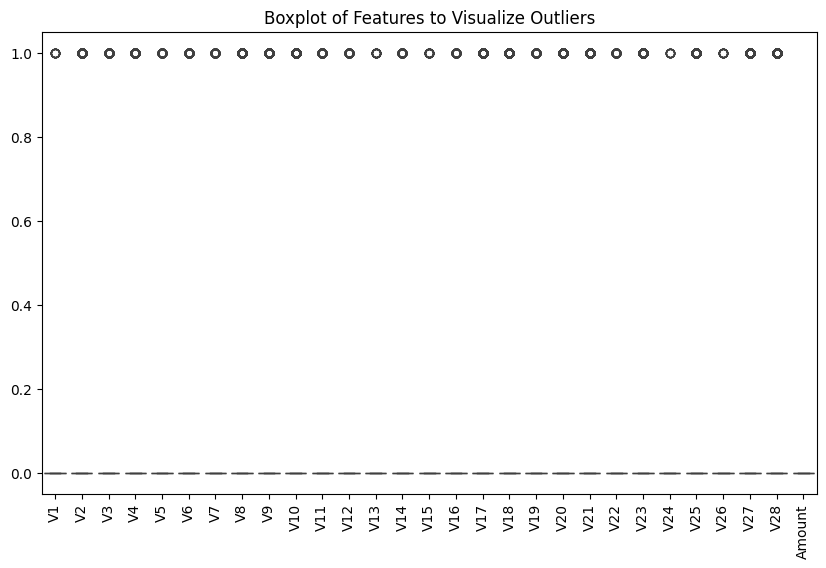

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=outliers)
plt.title('Boxplot of Features to Visualize Outliers')
plt.xticks(rotation=90)
plt.show()

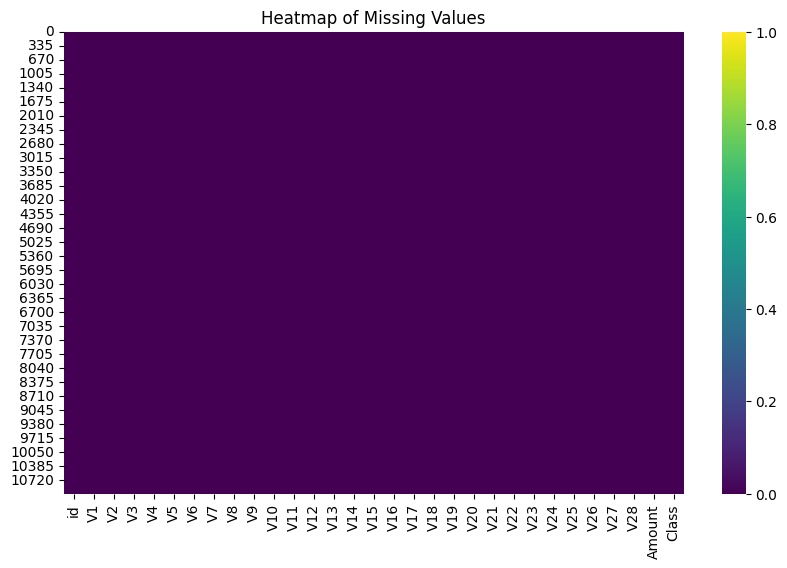

In [ ]:
import missingno as msno

plt.figure(figsize=(10, 6))
sns.heatmap(ccf_df.isnull(), cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

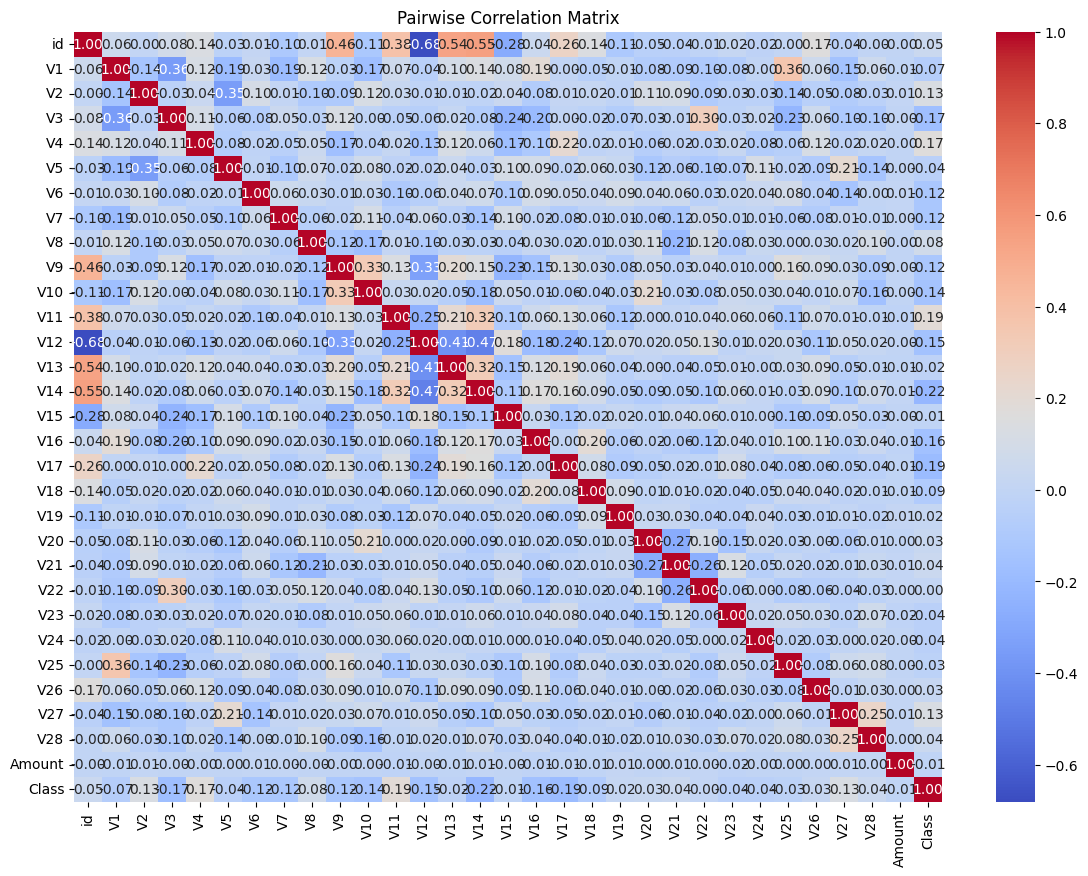

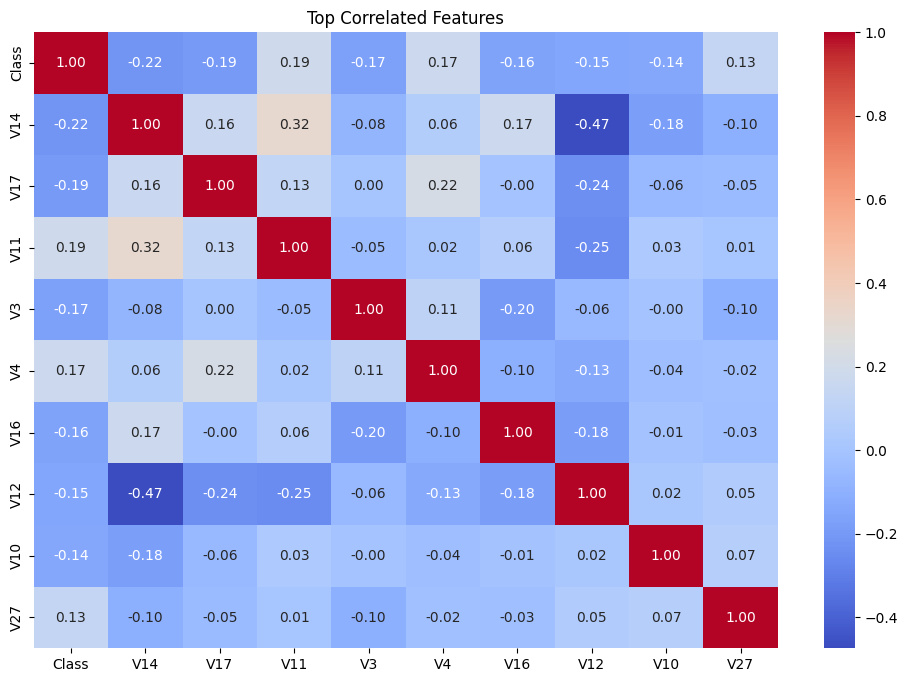

In [ ]:
# pairwise correlation matrix
correlation_matrix = ccf_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Matrix')
plt.show()

top_correlation_features = correlation_matrix.abs().nlargest(10, 'Class')['Class'].index
plt.figure(figsize=(12, 8))
sns.heatmap(ccf_df[top_correlation_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Correlated Features')
plt.show()

# MODEL TRAINING (1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logistic_model = LogisticRegression(random_state=42)

# train
logistic_model.fit(X_train, y_train)

#predict
y_pred_lr = logistic_model.predict(X_test)

accuracy_LR = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_LR)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Accuracy: 0.9995473064735174

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2199
         1.0       1.00      0.90      0.95        10

    accuracy                           1.00      2209
   macro avg       1.00      0.95      0.97      2209
weighted avg       1.00      1.00      1.00      2209


Confusion Matrix:
[[2199    0]
 [   1    9]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


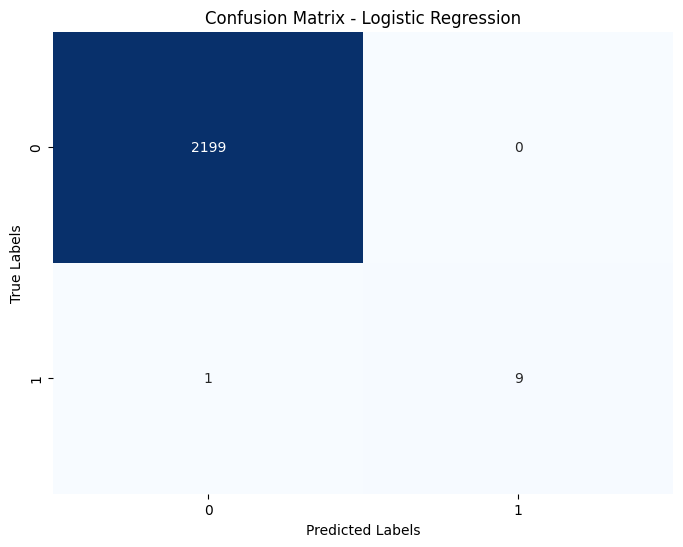

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# MODEL TRAINING (2) Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_classifier = DecisionTreeClassifier(random_state=42)

#train
dt_classifier.fit(X_train, y_train)

#predict
y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Accuracy: 0.9981892258940697

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2199
         1.0       0.75      0.90      0.82        10

    accuracy                           1.00      2209
   macro avg       0.87      0.95      0.91      2209
weighted avg       1.00      1.00      1.00      2209


Confusion Matrix:
[[2196    3]
 [   1    9]]


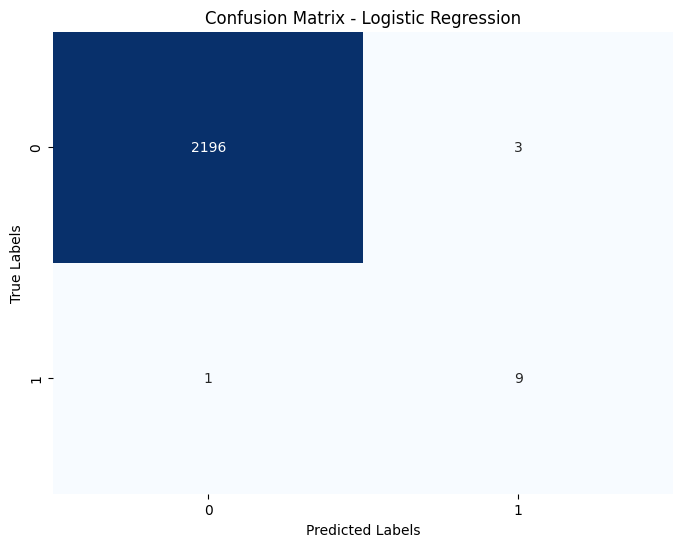

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# MODEL TRAINING (3) SVM - Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.9954730647351743

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2199
         1.0       0.00      0.00      0.00        10

    accuracy                           1.00      2209
   macro avg       0.50      0.50      0.50      2209
weighted avg       0.99      1.00      0.99      2209


Confusion Matrix:
[[2199    0]
 [  10    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
models = {
    'Logistic Regression': accuracy_LR,
    'Decision Tree': accuracy_dt,
    'Support Vector Machine': accuracy_svm
}

# Print accuracy of each model
for model, accuracy in models.items():
    print(f"{model} Accuracy: {accuracy}")


Logistic Regression Accuracy: 0.9995473064735174
Decision Tree Accuracy: 0.9981892258940697
Support Vector Machine Accuracy: 0.9954730647351743


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for each model
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

print("\nClassification Report for Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2199
         1.0       1.00      0.90      0.95        10

    accuracy                           1.00      2209
   macro avg       1.00      0.95      0.97      2209
weighted avg       1.00      1.00      1.00      2209


Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2199
         1.0       0.75      0.90      0.82        10

    accuracy                           1.00      2209
   macro avg       0.87      0.95      0.91      2209
weighted avg       1.00      1.00      1.00      2209


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2199
         1.0       0.00      0.00      0.00        10

    accuracy                           1.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PREDICTION


In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

def predict_with_decision_tree(new_data):
    return dt_classifier.predict(new_data)

svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

def predict_with_svm(new_data):
    return svm_classifier.predict(new_data)

logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)

def predict_with_logistic_regression(new_data):
    return logistic_classifier.predict(new_data)

new_transaction_data = pd.DataFrame({
    'Time': [406],
    'V1': [-2.312226542],
    'V2': [1.951992011],
    'V3': [-1.609850732],
    'V4': [3.997905588],
    'V5': [-0.522187865],
    'V6': [-1.426545319],
    'V7': [-2.537387306],
    'V8': [1.391657248],
    'V9': [-2.770089277],
    'V10': [-2.772272145],
    'V11': [3.202033207],
    'V12': [-2.899907388],
    'V13': [-0.595221881],
    'V14': [-4.289253782],
    'V15': [0.38972412],
    'V16': [-1.14074718],
    'V17': [-2.830055675],
    'V18': [-0.016822468],
    'V19': [0.416955705],
    'V20': [0.126910559],
    'V21': [0.517232371],
    'V22': [-0.035049369],
    'V23': [-0.465211076],
    'V24': [0.320198199],
    'V25': [0.044519167],
    'V26': [0.177839798],
    'V27': [0.261145003],
    'V28': [-0.143275875],
    'Amount': [0]
}, index=[0])

prediction_dt = predict_with_decision_tree(new_transaction_data)
prediction_svm = predict_with_svm(new_transaction_data)
prediction_logistic = predict_with_logistic_regression(new_transaction_data)

print("Decision Tree Prediction:", prediction_dt)
print("SVM Prediction:", prediction_svm)
print("Logistic Regression Prediction:", prediction_logistic)

if np.any(prediction_dt == 1) or np.any(prediction_svm == 1) or np.any(prediction_logistic == 1):
    print("!!! FRAUD DETECTED !!!")
else:
    print("Transaction is LEGITIMATE")


Decision Tree Prediction: [1]
SVM Prediction: [0]
Logistic Regression Prediction: [1]
!!! FRAUD DETECTED !!!


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
